<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/forecast_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima
!pip install catboost
!pip install skforecast
!pip install xgboost
!pip install lightgbm
!pip install nolds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00


In [3]:
import numpy as np
# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:

def metrics_stats(time_series):
    import numpy as np
    import nolds
    print('coef_hurst')
    H = nolds.hurst_rs(time_series,debug_plot=True)
    print(f"Hurst exponent: {H}")
    if H >0.5:
        print('Положительные дальнодействующия корреляция hurst')
    elif H<0.5:
        print('Отрицательная дальнодействующия корреляция hurs')
    else:
        print('в данных отсутствуют дальнодействующие корреляции hurst ШУМ')
    print()
    print()

    from scipy.stats import entropy

    # Вычисляем энтропию вашего временного ряда
    unique_values, counts = np.unique(time_series.values, return_counts=True)
    probs = counts / len(time_series)
    entropy_value = entropy(probs, base=2)

    # Ожидаемая энтропия для нормального распределения
    std_dev = np.std(time_series)
    expected_entropy = 0.5 * np.log2(2 * np.pi * np.e * std_dev**2)

    print("Энтропия вашего временного ряда:", entropy_value)
    print("Ожидаемая энтропия для нормального распределения с std dev", std_dev, ":", expected_entropy)
    print()
    print()


    from statsmodels.stats.diagnostic import acorr_ljungbox
    box_pierce = acorr_ljungbox(time_series,boxpierce=True)
    box_pierce['result'] = box_pierce.apply(lambda row: 'белый шум' if row['lb_pvalue'] >= 0.05 and row['bp_pvalue'] >= 0.05 else 'не белый шум', axis=1)
    print(box_pierce)
    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.graphics.tsaplots import plot_pacf
    import matplotlib.pyplot as plt

    # Вычисление частичной автокорреляции
    pacf = sm.tsa.stattools.pacf(time_series, nlags=52)

    # Визуализация частичной автокорреляции
    plot_pacf(time_series, lags=52)
    plt.show()

    print(f"Partial Autocorrelation Function (PACF): \n {pacf}")
    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt

    # Вычисление полной автокорреляции
    acf = sm.tsa.stattools.acf(time_series, nlags=52)

    # Визуализация полной автокорреляции
    plot_acf(time_series, lags=52)
    plt.show()

    print(f"Autocorrelation Function (ACF): \n {acf}")

    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.tsa.stattools import kpss


    print('Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)')
    #KPSS
    kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')
    # check p-value against significance level
    if p_value < 0.05:
        print('I По p-value, ряд НЕ стационарен метод KPSS')
    else:
        print('I По p-value, ряд стационарен метод KPSS')

    # check KPSS statistic against critical value

    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)

    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.tsa.stattools import adfuller

    print('Тест на стационарность Дики-Фуллера (Dickey-Fuller test')
    adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(time_series)
    print()
    print('kpss_stat', adf)
    print('pvalue', pvalue)
    print('usedlag', usedlag)
    print('nobs', nobs)
    print('critical_values', critical_values)

    print('Results of Dickey-Fuller Test:')

    if pvalue <= 0.05:
        print('I По p-value, ряд стационарен метод Dickey-Fuller Test')
    else:
        print('I По p-value, ряд НЕ стационарен метод Dickey-Fuller Test')

    # check ADF statistic against critical value
    if abs(adf) > abs(max(critical_values.values())):
        print('II По значению ADF статистики, ряд стационарен, метод Dickey-Fuller Test' )
    else:
        print('II По значению ADF Test статистики, ряд НЕ стационарен, метод Dickey-Fuller Test')
    # print('resstore', resstore)

    print()
    print()

    from pmdarima.arima.utils import ndiffs
    import pandas as pd


    n_diffs = ndiffs(time_series, test='kpss')

    print("ndiffs нужно ли делать дифференцацию:", n_diffs)
    print()
    print()

    from pmdarima.arima.utils import nsdiffs
    import pandas as pd

    # Определение количества сезонных разностей
    n_seasonal_diffs = nsdiffs(time_series,m=4)

    print("nsdiffs Сколько diff надо применить к данным:", n_seasonal_diffs)




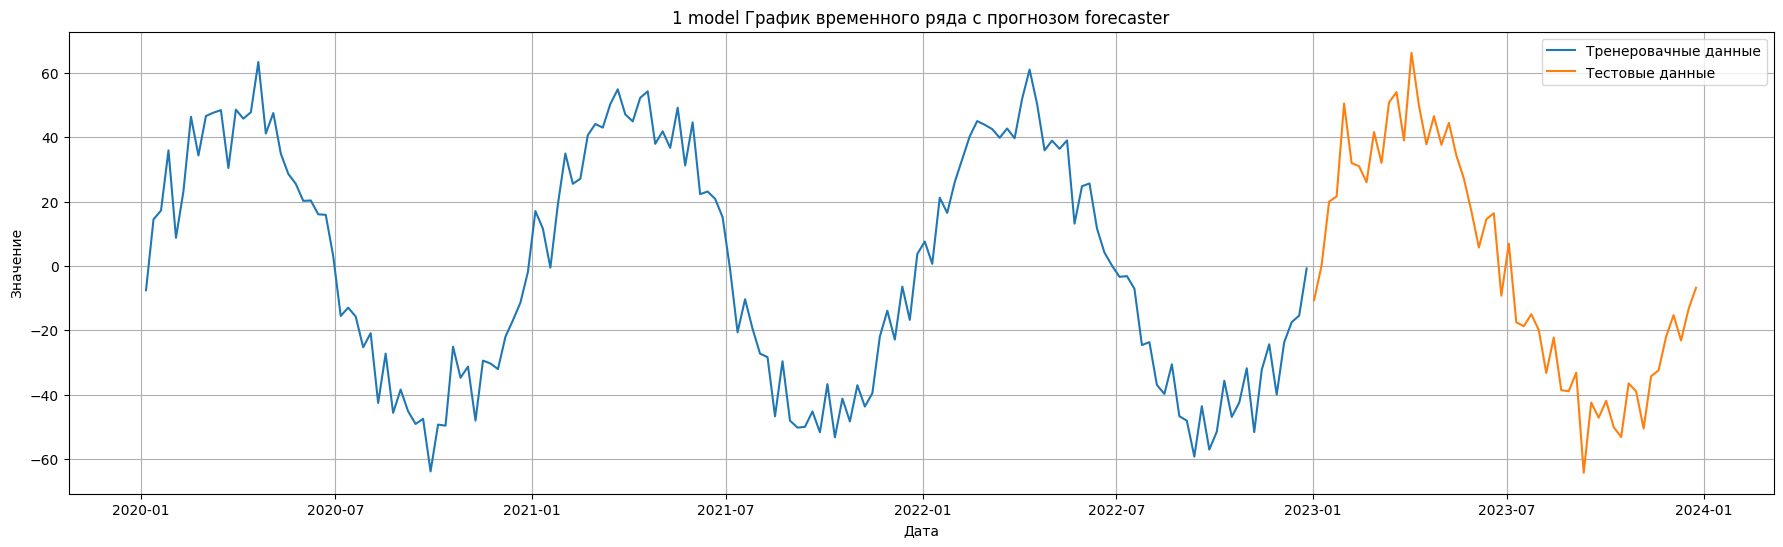

coef_hurst


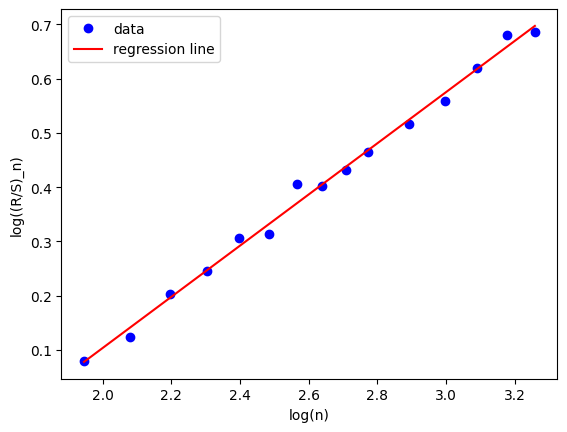

Hurst exponent: 0.9718623270541349
Положительные дальнодействующия корреляция hurst


Энтропия вашего временного ряда: 7.700439718141095
Ожидаемая энтропия для нормального распределения с std dev 35.49340948038282 : 7.196574845737134


        lb_stat      lb_pvalue      bp_stat      bp_pvalue        result
1    186.947898   1.474235e-42   184.277214   5.644040e-42  не белый шум
2    368.568626   9.254221e-81   362.438499   1.983718e-79  не белый шум
3    537.791303  3.077193e-116   527.632065  4.898683e-114  не белый шум
4    688.983954  8.462004e-148   674.504926  1.154402e-144  не белый шум
5    823.162472  1.127637e-175   804.210826  1.420138e-171  не белый шум
6    934.683622  1.191594e-198   911.483552  1.236446e-193  не белый шум
7   1023.759415  8.849797e-217   996.741811  6.091875e-211  не белый шум
8   1090.960314  3.432054e-230  1060.742667  1.150017e-223  не белый шум
9   1137.489400  3.771879e-239  1104.834515  4.200294e-232  не белый шум
10  1165.995413  3.109955e-244  11

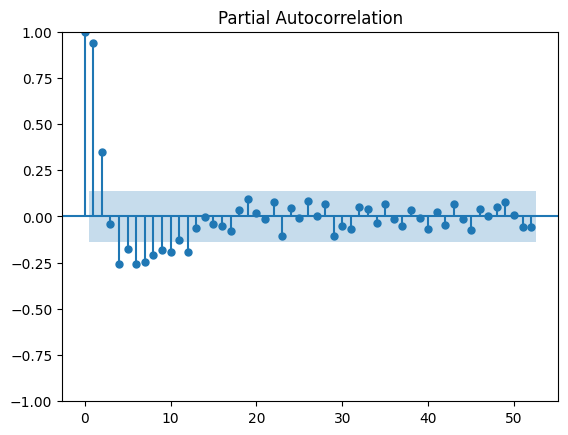

Partial Autocorrelation Function (PACF): 
 [ 1.          0.94579528  0.37881086 -0.03411653 -0.29481268 -0.22322823
 -0.31636661 -0.32670519 -0.31257078 -0.31225382 -0.3762878  -0.39961761
 -0.68877228 -1.54198768  2.48465509  0.75718415  0.56007869  0.58646989
  1.27112852 -4.47419996 -0.84884347 -0.53534981 -0.31863569 -0.45997556
 -0.27596776 -0.27639791 -0.03664009  0.05536544  0.35883291  0.35136654
  0.5870014   1.14875188 -8.11180559 -0.90260793 -0.63596266 -0.57499811
 -1.14406038  7.32337373  0.90588189  0.508207    0.31256525  0.37386077
  0.25896844  0.42208601  0.38411697  0.30888385  0.50228615  0.73895821
  2.74774238 -1.57982648 -0.68496164 -0.62818795 -0.93931778]




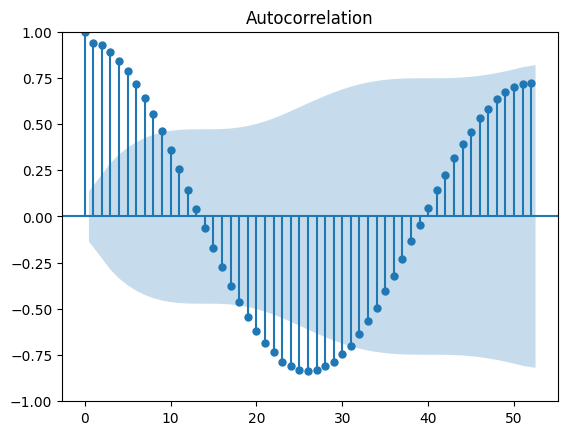

Autocorrelation Function (ACF): 
 [ 1.          0.94124818  0.92549697  0.8911789   0.84030919  0.78967465
  0.7181464   0.6402308   0.55470391  0.4604129   0.35946741  0.25706889
  0.14399385  0.04079557 -0.06463635 -0.17221565 -0.27416717 -0.37615042
 -0.46255772 -0.54206904 -0.61892011 -0.68382712 -0.73352935 -0.78653494
 -0.80920224 -0.83250455 -0.83485421 -0.82939809 -0.80886202 -0.7852447
 -0.74593902 -0.69898682 -0.63532122 -0.56414066 -0.49371676 -0.40333629
 -0.32210894 -0.2323943  -0.13495675 -0.04541751  0.04736762  0.14261368
  0.22684106  0.31708021  0.39248578  0.45734024  0.53203286  0.58237129
  0.63555762  0.6745281   0.69934803  0.71424439  0.7202826 ]



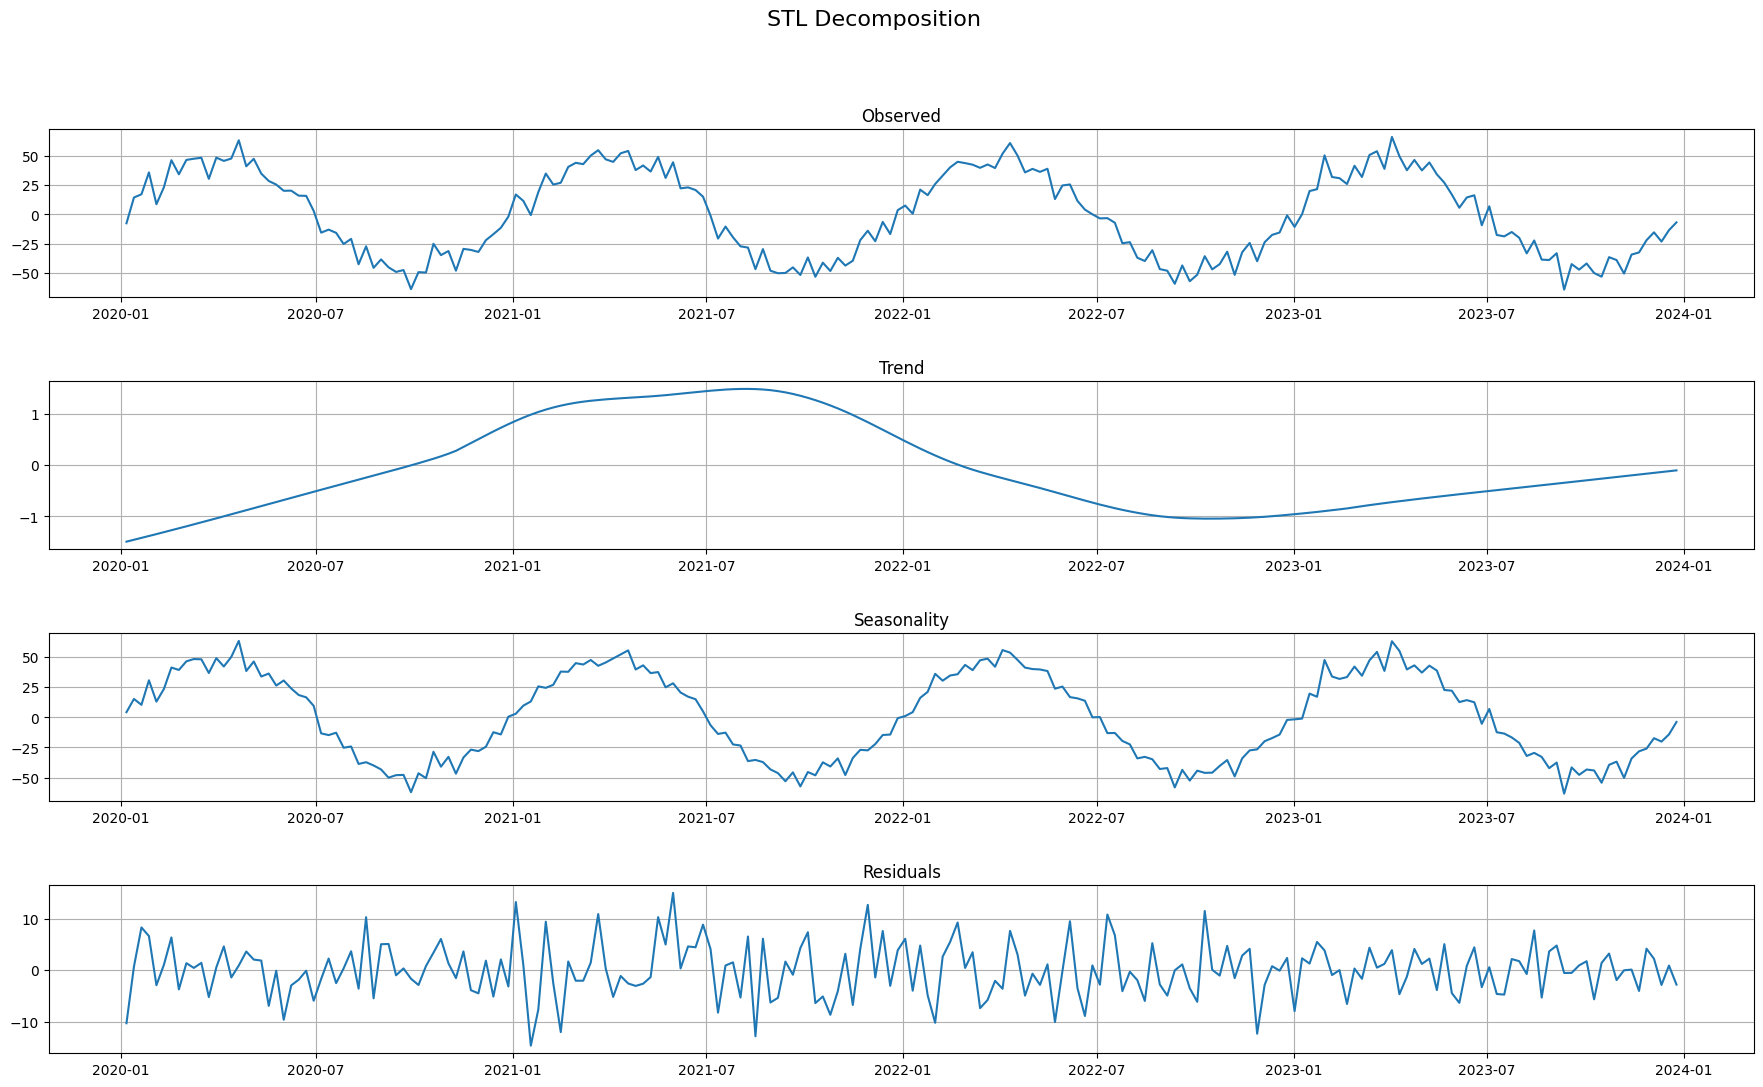

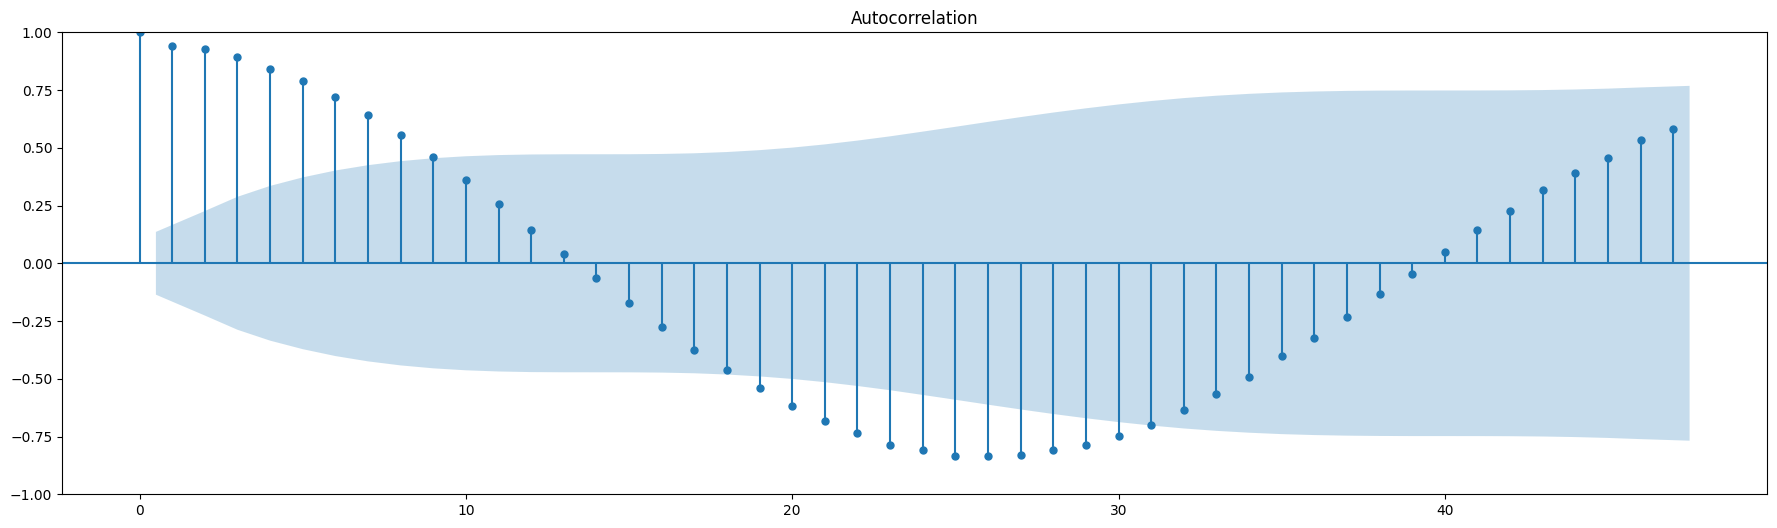

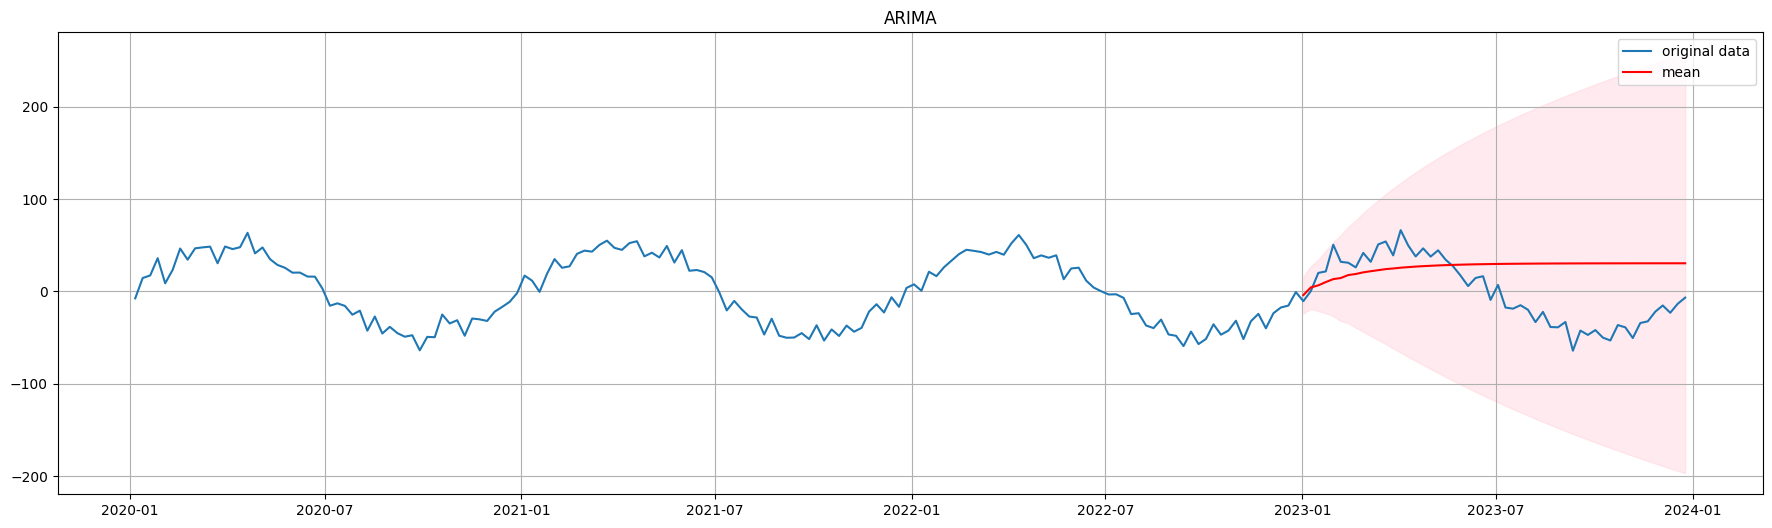


Train dates : 2020-01-06 00:00:00 --- 2022-12-26 00:00:00  (n=156)
Valid dates  : 2023-01-02 00:00:00 --- 2023-05-29 00:00:00  (n=22)
Test dates  : 2023-06-05 00:00:00 --- 2023-12-25 00:00:00  (n=30)


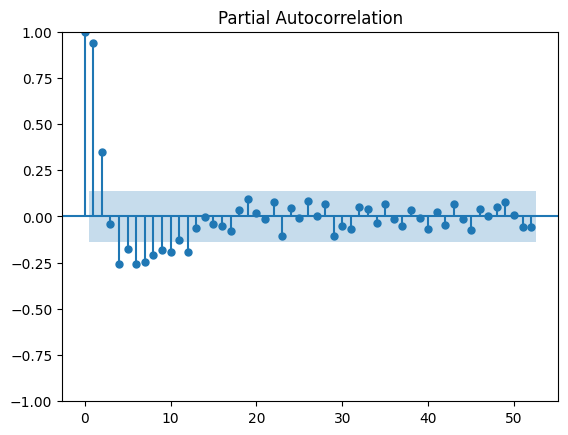

<ipython-input-13-990ec1518ce4>:264: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')



CТАТИСТИКА ОСНОВАНАЯ НА R

coef_hurst коэффициент Херста 0.9718623270541349

feat_spectral спектральную энтропию (Шеннона) 0.814344027173933

box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,
         lb_stat      lb_pvalue      bp_stat      bp_pvalue
1    186.947898   1.474235e-42   184.277214   5.644040e-42
2    368.568626   9.254221e-81   362.438499   1.983718e-79
3    537.791303  3.077193e-116   527.632065  4.898683e-114
4    688.983954  8.462004e-148   674.504926  1.154402e-144
5    823.162472  1.127637e-175   804.210826  1.420138e-171
6    934.683622  1.191594e-198   911.483552  1.236446e-193
7   1023.759415  8.849797e-217   996.741811  6.091875e-211
8   1090.960314  3.432054e-230  1060.742667  1.150017e-223
9   1137.489400  3.771879e-239  1104.834515  4.200294e-232
10  1165.995413  3.109955e-244  1131.711613  7.684807e-237

ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,
         lb_stat      lb_

[W 2024-03-13 14:41:47,653] Trial 14 failed with parameters: {'depth': 10, 'learning_rate': 0.011114245992801641} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.10/dist-packages/skforecast/model_selection/model_selection.py", line 1520, in _objective
    forecaster.set_params(search_space(trial))
  File "<ipython-input-13-990ec1518ce4>", line 329, in search_space_cb_52
    'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
  File "/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py", line 321, in suggest_int
    suggested_value = int(self._suggest(name, distribution))
  File "/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py", line 630, in _suggest
    param_value = self.study.sampler.sample_independent(
  File "/usr/local/lib/python3.10/dist-p

KeyboardInterrupt: 

In [13]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random

random.seed(4)
np.random.seed(4)

# Определение количества периодов
n_periods = 1460  # Примерное количество периодов в вашем временном ряду
train_size = 1096
valid_size = 183
seasonality_amplitude = 100  # Амплитуда сезонности
end_train = '2023-01-01 23:59:59'


# Генерация значений временного ряда
trend_slope = 0.5
noise_level = 3.0


# Создаем временной ряд
time = np.arange(1, 1461)

# Определение количества периодов
# Создаем временной ряд
time = np.arange(1, 1461)
kf = 0.5
# Создаем сезонность
seasonality = kf* np.sin(time * 2 * np.pi / 365)

# Создаем тренд
trend = np.where(time <= 700, time / 700, (1460 - time) / 760)
noise = np.random.normal(loc=0, scale=0.08, size=len(time))
# Комбинируем тренд и сезонность
values_seasonal = seasonality+noise #+trend

# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})

# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']

data = data.sort_index()
data=data * 100




# # Генерация случайной даты в указанном интервале
# random_date = random.choice(pd.date_range(start='2020-01-01', end='2023-01-01',freq='MS'))

# # Умножение значения в случайно выбранной точке на 1.5
# data.loc[random_date] *= 1.5



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('1 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)

metrics_stats(data)
print()
stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'1_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'1_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'1_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 1_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'1_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'1_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'1_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'4_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('1_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('1_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('1_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('1_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('1_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('1_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('1_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('1_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")





In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random

random.seed(2)
np.random.seed(2)



# Определение количества периодов
n_periods = 1460  # Примерное количество периодов в вашем временном ряду
train_size = 1096
valid_size = 183
seasonality_amplitude = 100  # Амплитуда сезонности
end_train = '2023-01-01 23:59:59'
trend_amplitude = 300


# Генерация значений временного ряда
trend_slope = 0.5
noise_level = 10.0



periods = np.arange(1, n_periods + 1)
trend = trend_slope * periods
noise = np.random.normal(0, noise_level, n_periods)
values = trend + noise
seasonality = seasonality_amplitude * np.sin(2 * np.pi * periods / 365)


# Создаем тренд
seasonality_trend = np.ones_like(periods, dtype=float)
seasonality_trend[:500] = (periods[:500] / 500) * trend_amplitude
seasonality_trend[500:] = ((1460 - periods[500:])**2 / (800**2)) * trend_amplitude

values_seasonal = seasonality + values + seasonality_trend

# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})

# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']

data = data.sort_index()
data = data/6



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('2 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
print()
metrics_stats(data)

stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'2_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'2_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'2_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 2_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'2_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'2_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'2_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'2_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('2_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('2_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('2_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('2_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('2_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('2_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('2_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('2_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")







In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random

random.seed(3)
np.random.seed(3)

# Определение количества периодов
# Создаем временной ряд
time = np.arange(1, 1461)
kf = 0.5
# Создаем сезонность
seasonality = kf* np.sin(time * 2 * np.pi / 365)

# Создаем тренд
trend = np.where(time <= 700, time / 700, (1460 - time) / 760)
noise = np.random.normal(loc=0, scale=0.08, size=len(time))
# Комбинируем тренд и сезонность
values_seasonal = trend + seasonality+noise

# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})

# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']

data = data.sort_index()
data=data * 100


# # Генерация случайной даты в указанном интервале
# random_date = random.choice(pd.date_range(start='2020-01-01', end='2023-01-01',freq='MS'))

# # Умножение значения в случайно выбранной точке на 1.5
# data.loc[random_date] *= 1.5



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('3 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
print()
metrics_stats(data)
stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'3_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'3_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'3_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 3_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'3_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'3_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'3_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'3_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('3_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('3_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('3_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('3_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('3_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('3_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('3_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('3_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")







In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random


random.seed(1)
np.random.seed(1)

# Определение количества периодов
n_periods = 1460  # Примерное количество периодов в вашем временном ряду
train_size = 1096
valid_size = 183
seasonality_amplitude = 100  # Амплитуда сезонности
end_train = '2023-01-01 23:59:59'


# Генерация значений временного ряда
trend_slope = 0.5
noise_level = 3.0


# Создаем временной ряд
time = np.arange(1, 1461)

# Создаем сезонность с уменьшенной амплитудой

seasonality = 0.3 * np.sin(time * 2 * np.pi / 365)

# Создаем тренд
trend = np.where(time <= 365, time / 365,
                 np.where(time <= 730, (730 - time) / 365,
                          (time - 730) / 730))

# Генерируем шум
noise = np.random.normal(loc=0, scale=0.05, size=len(time))

# Комбинируем тренд, сезонность и шум
values_seasonal = trend + seasonality + noise


# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})
# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']
print(data.dtypes)


data = data.sort_index()
data=data * 100

# # Генерация случайной даты в указанном интервале
# random_date = random.choice(pd.date_range(start='2020-01-01', end='2023-01-01',freq='MS'))

# # Умножение значения в случайно выбранной точке на 1.5
# data.loc[random_date] *= 1.5



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('4 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
print()
metrics_stats(data)
stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'4_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'4_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'4_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 4_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'4_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'4_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'4_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'4_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('4_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('4_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('4_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('4_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('4_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('4_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('4_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('4_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")


